<a href="https://colab.research.google.com/github/Pawanme9034/decision_tree/blob/main/Decision_Trees_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [4]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [5]:
a='https://raw.githubusercontent.com/Pawanme9034/decision_tree/main/housing.csv'
df= pd.read_csv(a)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.shape

(506, 14)

In [9]:
df['MEDV'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

In [10]:
# droping row which contains the null values
df.dropna(inplace= True)

In [11]:
df.shape

(506, 14)

In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
dependent_variable = 'MEDV'
independent_variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [14]:
X = df[independent_variables]
y = df[dependent_variable]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [28]:
# Create and train the classifier
price_regressor = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=9, random_state=0)
price_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, random_state=0)

In [29]:
# Predict the target variable for the test data
y_predicted = price_regressor.predict(X_test)

In [17]:
# Predict the target variable for the train data
y_train_predicted = price_regressor.predict(X_train)

In [32]:

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_predicted)

# Print the mean squared error
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 35.30


In [30]:
y_predicted[:10]

array([46.25      , 24.19473684, 12.44918033, 12.44918033, 20.58956522,
       46.25      , 24.19473684, 33.18      , 20.58956522, 46.25      ])

In [31]:
y_test[:10]

233    48.3
53     23.4
423    13.4
399     6.3
346    17.2
226    37.6
69     20.9
264    36.5
488    15.2
232    41.7
Name: MEDV, dtype: float64

In [23]:
df.iloc[-1]

CRIM         0.04741
ZN           0.00000
INDUS       11.93000
CHAS         0.00000
NOX          0.57300
RM           6.03000
AGE         80.80000
DIS          2.50500
RAD          1.00000
TAX        273.00000
PTRATIO     21.00000
B          396.90000
LSTAT        7.88000
MEDV        11.90000
Name: 505, dtype: float64

#Visualisation.

In [24]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

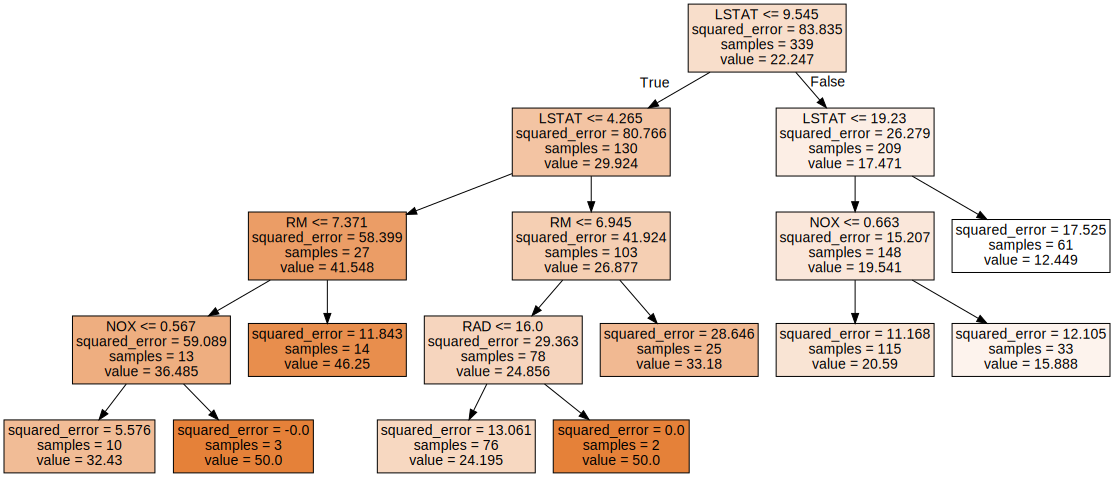

In [33]:
graph = Source(tree.export_graphviz(reg, out_file=None
   , feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
#r2 train
rt2=r2_score(y_train, reg.predict(X_train))
rt2

0.8352160976964285

In [37]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)

0.5852493400093502


In [38]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

35.296270415944825


In [39]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

5.9410664375972795


In [40]:
#mae
mean_absolute_error (y_test,y_predicted)

3.919373676809231

In [42]:
#MAPE
import numpy as np
def mean_absolute_percentage_error(y_t, y_p): 
    y_t, y_p = np.array(y_t), np.array(y_p)
    return np.mean(np.abs((y_t - y_p) / y_t)) * 100



mean_absolute_percentage_error(y_test,y_predicted)

18.771765054453898

In [43]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.550009087853282 167 13


In [45]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [ 0.82104791  0.61772345  0.81045471  0.47574204 -0.09541531  0.79966572
  0.62373783  0.85079458  0.81266645  0.81504265]
Accuracy of Test Data : [0.89838508 0.88512281 0.6727666  0.81175746 0.83221622 0.48219897
 0.91505687 0.45370841 0.83802033 0.86491262]
[46.25       24.19473684]
